## Hausarbeit 5.2
Laden Sie den Datensatz zu den Weinqualitäten wie in vorhergehenden
Vorlesungen gezeigt. Erstellen Sie ein neuronales Netzwerk welches aus
den chemischen Weineigenschaften die Geschmacksqualität hervorsagt. 

• Wie lange dauert es das Netzwerk zu trainieren?

• Welche Faktoren spielen bei der Trainingsdauer eine Rolle?

• Wie würden Sie diesen Datensatz grafisch darstellen? Zeigen Sie Beispiele.

<span style="color:red">**Anmerkung: Die Beantwortung der Fragen finden Sie am Ende dieses Notebooks**</span>

In [91]:
# Imprt der Bibliotheken
import numpy as np
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import os
import torch.nn as nn
from collections import OrderedDict
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [92]:
# Einladen des Datensatzes als numpy-Array
# Hierbei wird die erste Zeile mit den Überschriften des Datensatzes übersprungen. 
wineq_numpy = np.loadtxt("winequality-white.csv", dtype=np.float32, delimiter=";", skiprows=1)

# Transformation des numpy-Arrays in einen Torch-Tensor
wineq_tensor = torch.tensor(wineq_numpy, dtype=torch.float)

# Aufteilen des Datensatzes in die Targetwerte (Qualität) und Featurewerte (chemische Weineigenschaften)
quality = wineq_tensor[:, -1]
chemical_features = wineq_tensor[:, :-1]

In [93]:
# Bildung der zufälligen Indizes
n_samples = chemical_features.shape[0]
n_val = int(0.3 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

# Aufteilen der Daten in zufällige Validierungs- und Trainingsdatensätze
# Trainingsdatensatz
quality_train = quality[train_indices].unsqueeze(1)
chemical_features_train = chemical_features[train_indices]

# Validierungsdatensatz
quality_val = quality[val_indices].unsqueeze(1)
chemical_features_val = chemical_features[val_indices]

In [94]:
# Definition des Trainingloops
def training_loop(n_epochs, optimizer, model, loss_fn, chemical_features_train, chemical_features_val,
                  quality_train, quality_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(chemical_features_train) 
        loss_train = loss_fn(t_p_train, quality_train)

        t_p_val = model(chemical_features_val) 
        loss_val = loss_fn(t_p_val, quality_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 2000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

# Definition des KNN
seq_model = nn.Sequential(OrderedDict(
    [('hidden_linear', nn.Linear(11, 50)),
     ('hidden_activation', nn.Tanh()),
     ('output_linear', nn.Linear(50, 1))]))

# Definition des Optimizers mit einer Learnings-rate von 0.001
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3) 

In [95]:
# Trainieren des models mit n-Epochen und der entsprechenden Trainings- und Validierungsdaten
training_loop(
    n_epochs = 20000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    chemical_features_train = chemical_features_train,
    chemical_features_val = chemical_features_val, 
    quality_train = quality_train,
    quality_val = quality_val)

Epoch 1, Training loss 25.8623, Validation loss 26.3242
Epoch 2000, Training loss 0.6442, Validation loss 0.6706
Epoch 4000, Training loss 0.6229, Validation loss 0.6385
Epoch 6000, Training loss 0.6223, Validation loss 0.6245
Epoch 8000, Training loss 0.6166, Validation loss 0.6181
Epoch 10000, Training loss 0.6119, Validation loss 0.6145
Epoch 12000, Training loss 0.6079, Validation loss 0.6119
Epoch 14000, Training loss 0.6043, Validation loss 0.6097
Epoch 16000, Training loss 0.6014, Validation loss 0.6078
Epoch 18000, Training loss 0.5988, Validation loss 0.6061
Epoch 20000, Training loss 0.5967, Validation loss 0.6047


#### **Frage: Wie lange dauert es das Netzwerk zu trainieren?**
Antwort: Das Trainieren des Netzwerks dauert auf meinem Rechner ungefähr 21 Sekunden. 

#### **Frage: Welche Faktoren spielen bei der Trainingsdauer eine Rolle?**
Antwort: Die Trainingsdauer des Netzwerks ist abhängig von der Anzahl der Trainingsepochen und der gewählten Lernrate. 
Zusätzlich hängt das Training mit der Leistungsfähigkeit (CPU und GPU) des Rechners zusammen. Auch die Größe des Trainingsdatensatzes kann die Trainigsdauer verlängern, da das Modell mehr Daten verarbeiten muss. 

#### **Frage: Wie würden Sie diesen Datensatz grafisch darstellen? Zeigen Sie Beispiele.**
Antwort: Ich würde die Daten in einem Scatter-Diagramm darstellen, wobei jede einzelne chemische Weineigenschaft gegenüber der gemessenen Qualität geplottet wird. Würde man alle Daten in ein Diagramm plotten, wäre dieses sehr unübersichtlich. Schwierig ist auch, dass die Daten der einzelnen Features unterschiedliche Datenformate besitzen. Daher kann man aus diesem Diagramm Zusammenhänge zwischen den Features und dem Target vermutlich nur schwer herleiten. Schaut man sich diese in einzelnen Subplots an, lassen sich Zusammenhänge leichter erkennen. 

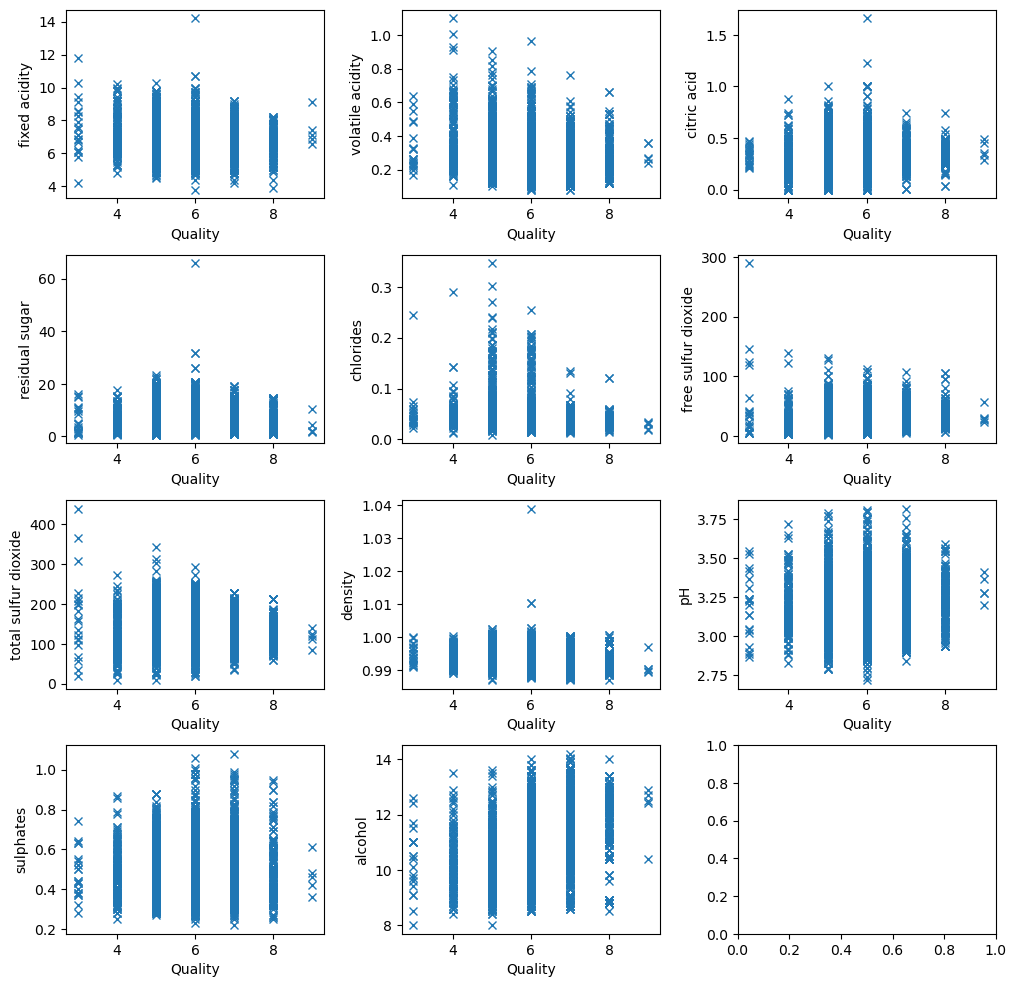

In [112]:
# Darstellung des Datensatzes:
# Feature-Namen
feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                 'density', 'pH', 'sulphates', 'alcohol']
# Anzahl der Features
features = chemical_features.shape[1]
# Anzahl der Subplots pro Zeile/Spalte
num_subplots_row = 4
num_subplots_column = 3
# Definition des Subplots
fig, axes = plt.subplots(num_subplots_row, num_subplots_column, figsize=(12, 12))

# Iteration über alle Features
for feature in range(features):
    # Bestimmen der Zeile und Spalte des Subplots
    row = feature // num_subplots_column # Integer Division - Floor
    col = feature % num_subplots_column  # Modulus Operator - Rest
    
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    
    # Plot der chemischen Weineigenschaften gegenüber der Qualität
    axes[row, col].plot(quality, chemical_features[:, feature], 'x')
    axes[row, col].set_xlabel('Quality')
    axes[row, col].set_ylabel(feature_names[feature])
    
# Anzeigen der Plots
plt.show()
